In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns

tf.random.set_seed(1)

# [Module 77: multi class classification part 1 (preparing data)](https://youtu.be/ZUKz4125WNI?t=7828)

We'll make a neural network to classify different items of clothing

In [3]:
# downlaod data
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

### Getting a sense of the data

In [4]:
print(train_data[0])
print("---")
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(train_data[0].shape, train_labels[0].shape)
# ok so it's 28z28 pixels for input and number representing category for output

(28, 28) ()


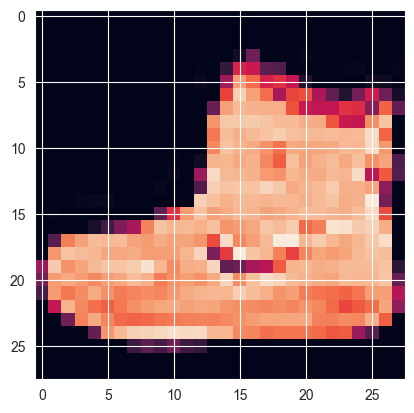

9


In [6]:
plt.imshow(train_data[0])
plt.show()
print(train_labels[0])

# [Module 78: multi class classification part 2 (becoming one with the data)](https://youtu.be/ZUKz4125WNI?t=7828)

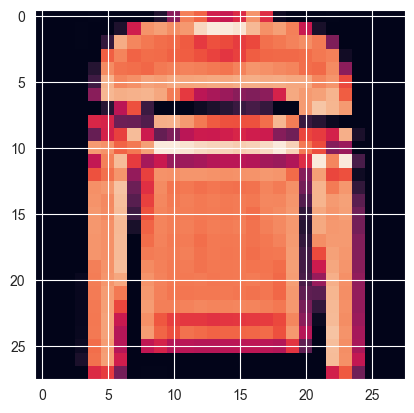

Pullover


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = 5
plt.imshow(train_data[i])
plt.show()
print(class_names[train_labels[i]])


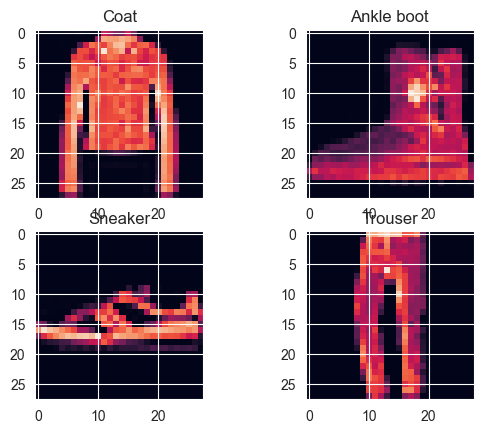

In [8]:
# plot a bunch of random images
import random
fig, ax = plt.subplots(2, 2)
for _ in range(8):
    current = random.choice(range(len(train_data)))
    ax[0][0].imshow(train_data[current])
    ax[0][0].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[0][1].imshow(train_data[current])
    ax[0][1].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[1][0].imshow(train_data[current])
    ax[1][0].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[1][1].imshow(train_data[current])
    ax[1][1].set_title(class_names[train_labels[current]])

# [Module 78: multi class classification part 3: building multi-class classification model](https://youtu.be/ZUKz4125WNI?t=8893)

1. Input shape: 28x28
2. Output shape: 10 (one per type of clothing)
3. Loss function: tf.keras.losses.CategoricalCrossentropy() if one hot encoded. int => SparseCategoricalCrossentropy()
4. Output layer activation: softmax

In [9]:
# create model
multi_model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

multi_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # CategoricalCrossentropy() only for one hot encoded
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

non_norm_hist = multi_model1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))



Epoch 1/10


2023-02-22 11:49:25.812734: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 523us/step - loss: 2.2662 - accuracy: 0.2322 - val_loss: 1.7448 - val_accuracy: 0.2587
Epoch 2/10
1875/1875 [==============================] - 1s 475us/step - loss: 1.4792 - accuracy: 0.3890 - val_loss: 1.3105 - val_accuracy: 0.4497
Epoch 3/10
1875/1875 [==============================] - 1s 497us/step - loss: 1.2876 - accuracy: 0.4562 - val_loss: 1.2358 - val_accuracy: 0.4860
Epoch 4/10
1875/1875 [==============================] - 1s 477us/step - loss: 1.1486 - accuracy: 0.5166 - val_loss: 1.1267 - val_accuracy: 0.5355
Epoch 5/10
1875/1875 [==============================] - 1s 467us/step - loss: 1.0538 - accuracy: 0.5424 - val_loss: 1.0708 - val_accuracy: 0.5526
Epoch 6/10
1875/1875 [==============================] - 1s 467us/step - loss: 1.0254 - accuracy: 0.5560 - val_loss: 1.0321 - val_accuracy: 0.5612
Epoch 7/10
1875/1875 [==============================] - 1s 488us/step - loss: 1.0069 - accuracy: 0.5657 - val_loss: 1.0342 - val_accura

# [Module 82 multi-class classification part 4 (improving our model)](https://youtu.be/ZUKz4125WNI?t=9832)

In [10]:
print(train_data.min(), train_data.max())
# we can normalize to get 0-255 to 0-1
normalized_x_train = train_data / 255.0
normalized_x_test = test_data / 255.0
print(normalized_x_train.min(), normalized_x_train.max())


0 255
0.0 1.0


In [11]:
# trying the model with normalized data. Works much better!
multi_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer="Adam",
                     metrics=["accuracy"])

norm_history = multi_model2.fit(normalized_x_train, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.5189 - accuracy: 0.8178 - val_loss: 62.4911 - val_accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.3853 - accuracy: 0.8608 - val_loss: 60.4842 - val_accuracy: 0.8401
Epoch 3/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.3505 - accuracy: 0.8734 - val_loss: 65.8302 - val_accuracy: 0.8196
Epoch 4/10
1875/1875 [==============================] - 1s 603us/step - loss: 0.3321 - accuracy: 0.8777 - val_loss: 61.8783 - val_accuracy: 0.8377
Epoch 5/10
1875/1875 [==============================] - 1s 595us/step - loss: 0.3117 - accuracy: 0.8854 - val_loss: 64.0816 - val_accuracy: 0.8382
Epoch 6/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.2991 - accuracy: 0.8890 - val_loss: 64.2086 - val_accuracy: 0.8347
Epoch 7/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.2867 - accuracy: 0.8940 - val_loss: 73

# [Module 83 mutli class classification 5: comparing normalized data to non-normalized](https://www.youtube.com/watch?t=9832&v=ZUKz4125WNI&feature=youtu.be&ab_channel=DanielBourke)

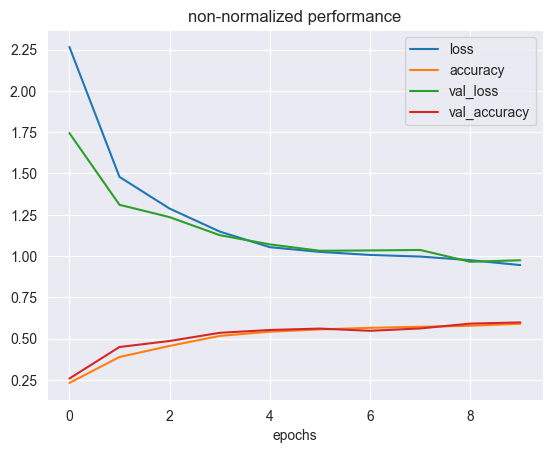

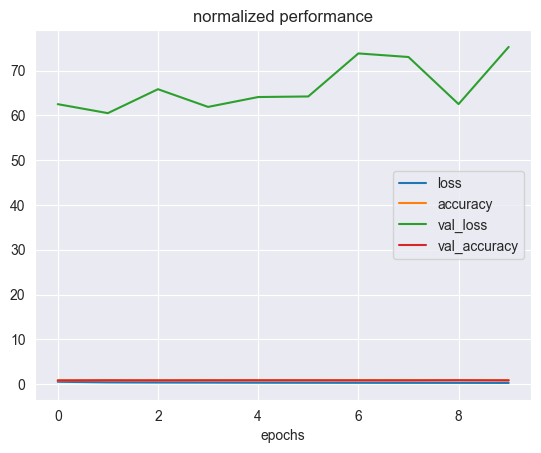

In [31]:
pd.DataFrame(non_norm_hist.history).plot()
plt.xlabel("epochs")
plt.title("non-normalized performance")
plt.show()
pd.DataFrame(norm_history.history).plot()
plt.xlabel("epochs")
plt.title("normalized performance")
plt.show()

# [Module 84 mutli class classification 6: finding ideal learning rate](https://youtu.be/ZUKz4125WNI?t=10848)

In [24]:
# start off same as before
multi_model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(-20))

# fit the model
find_lr_history = multi_model3.fit(normalized_x_train, train_labels, epochs=40, validation_data=(normalized_x_train, train_labels), verbose=1, callbacks=[lr_scheduler])

3
Epoch 1/40
1875/1875 [==============================] - 2s 979us/step - loss: 2.3768 - accuracy: 0.0760 - val_loss: 2.3768 - val_accuracy: 0.0760 - lr: 1.0000e-24
Epoch 2/40
1875/1875 [==============================] - 2s 859us/step - loss: 2.3768 - accuracy: 0.0760 - val_loss: 2.3768 - val_accuracy: 0.0760 - lr: 1.0000e-24
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3768 - accuracy: 0.0760 - val_loss: 2.3768 - val_accuracy: 0.0760 - lr: 1.0000e-24
Epoch 4/40
1875/1875 [==============================] - 2s 907us/step - loss: 2.3768 - accuracy: 0.0760 - val_loss: 2.3768 - val_accuracy: 0.0760 - lr: 1.0000e-24
Epoch 5/40
1875/1875 [==============================] - 2s 887us/step - loss: 2.3768 - accuracy: 0.0760 - val_loss: 2.3768 - val_accuracy: 0.0760 - lr: 1.0000e-24
Epoch 6/40
1875/1875 [==============================] - 2s 871us/step - loss: 2.3768 - accuracy: 0.0760 - val_loss: 2.3768 - val_accuracy: 0.0760 - lr: 1.0000e-24
Epoch 7/40
1875/1875 [

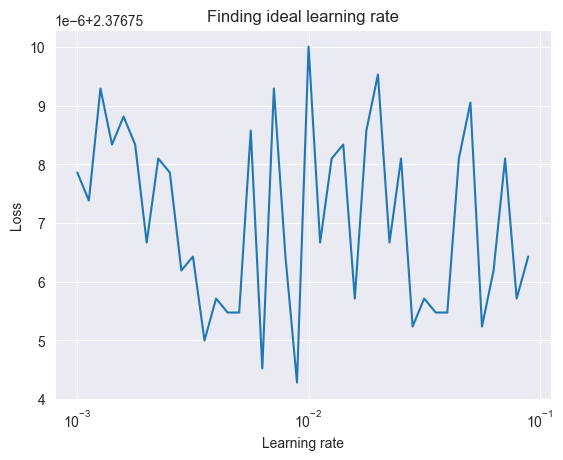

In [25]:
# plot learning rate decay curve. why does this look weird?
lrs = 10e-4 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")
plt.show()

In [29]:
# making a NN with changed learning rate
multi_model4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                     metrics=["accuracy"])

# fit the model
multi_4_hist = multi_model4.fit(normalized_x_train, train_labels, epochs=20, validation_data=(normalized_x_train, train_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 2s 978us/step - loss: 0.5112 - accuracy: 0.8161 - val_loss: 0.4601 - val_accuracy: 0.8274
Epoch 2/20
1875/1875 [==============================] - 2s 858us/step - loss: 0.4006 - accuracy: 0.8547 - val_loss: 0.3839 - val_accuracy: 0.8622
Epoch 3/20
1875/1875 [==============================] - 2s 853us/step - loss: 0.3767 - accuracy: 0.8634 - val_loss: 0.3508 - val_accuracy: 0.8704
Epoch 4/20
1875/1875 [==============================] - 2s 838us/step - loss: 0.3649 - accuracy: 0.8677 - val_loss: 0.3412 - val_accuracy: 0.8729
Epoch 5/20
1875/1875 [==============================] - 2s 851us/step - loss: 0.3518 - accuracy: 0.8715 - val_loss: 0.3133 - val_accuracy: 0.8870
Epoch 6/20
1875/1875 [==============================] - 2s 868us/step - loss: 0.3415 - accuracy: 0.8756 - val_loss: 0.3072 - val_accuracy: 0.8860
Epoch 7/20
1875/1875 [==============================] - 2s 901us/step - loss: 0.3344 - accuracy: 0.8773 - val_loss: 0.3504 -

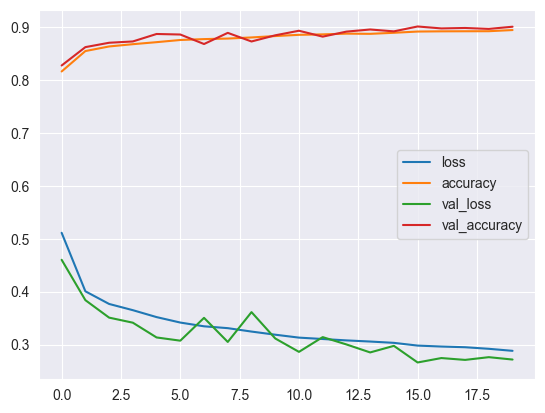

In [32]:
pd.DataFrame(multi_4_hist.history).plot()
plt.show()

# [Module 85 mutli class classification 7: evaluating our model](https://youtu.be/ZUKz4125WNI?t=11487)
We can evaluate it by:
1. using other classification methods like confusion matrix
2. assess predictions with visualizations
3. improve its results (by training for longer or adjusting architecture)
4. save and export for use in future application

# [Module 85 mutli class classification 8: evaluating our model with a confusion matrix](https://youtu.be/ZUKz4125WNI?t=12334)


In [55]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
    plt.style.use("default")
    import itertools
    from sklearn.metrics import confusion_matrix
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

  # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    plt.show()

In [41]:
y_pred_probs = multi_model4.predict(normalized_x_test)
print(y_pred_probs[0], class_names[np.argmax(y_pred_probs[0])])  # each element of y_pred_probs at index i is p(category i)

# let's turn predict probability arrays into integers
y_pred = y_pred_probs.argmax(axis=1)
display(y_pred)

313/313 [==============================] - 0s 319us/step
[8.0312130e-17 6.6237273e-11 8.0498247e-11 5.4003710e-21 1.1293133e-22
 1.2818020e-02 5.0089366e-08 5.8274865e-02 2.1197468e-06 9.2890495e-01] Ankle boot


array([9, 2, 1, ..., 8, 1, 5])

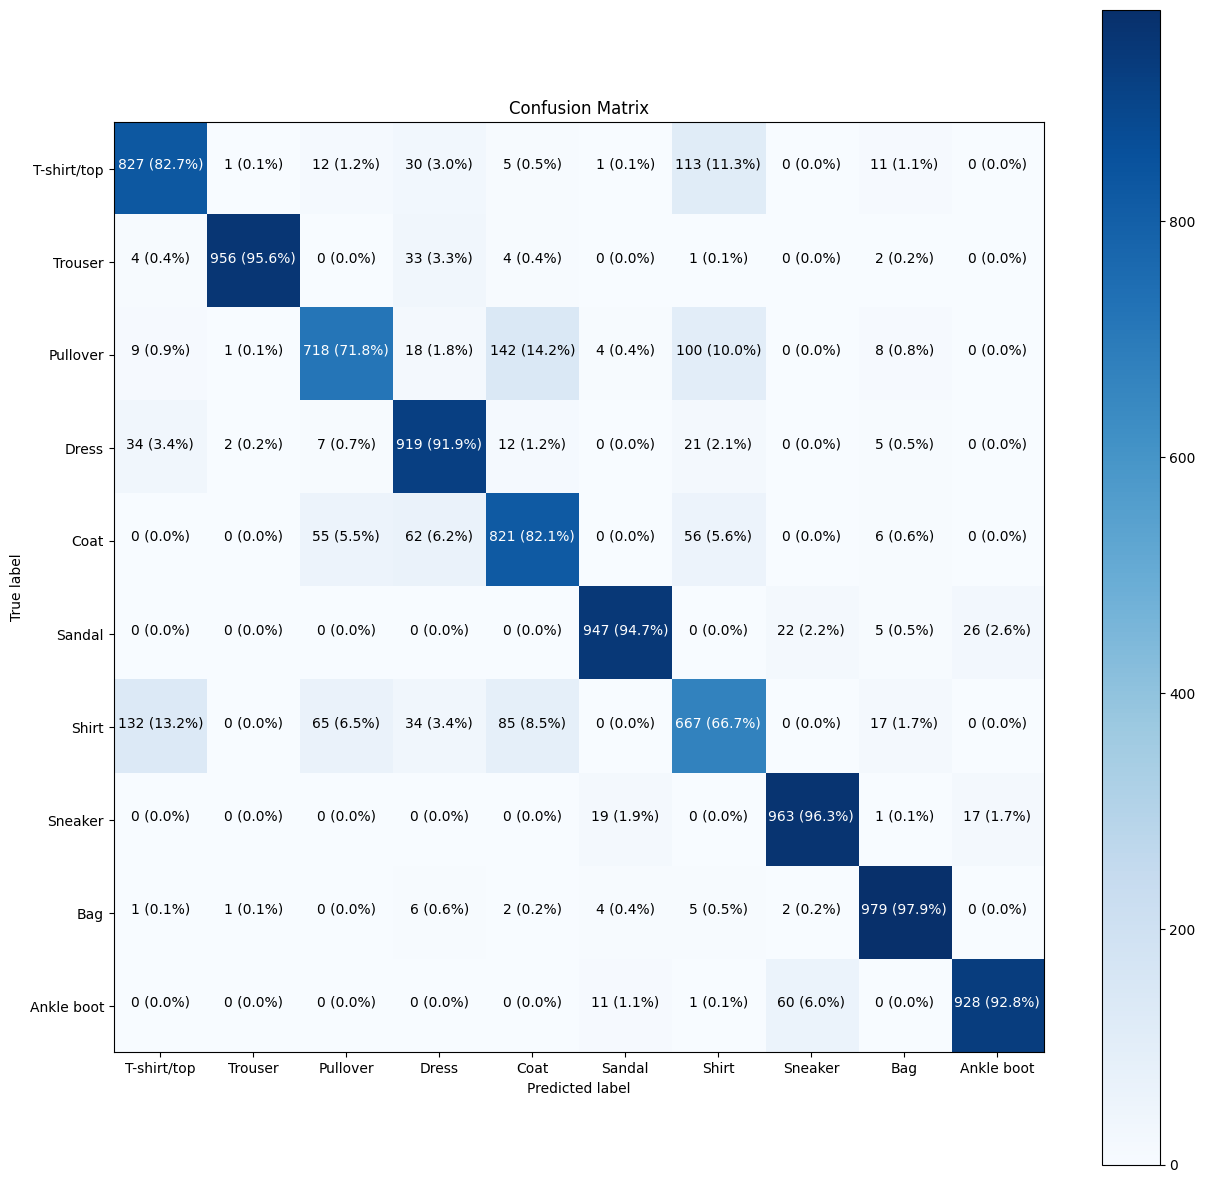

In [56]:
# compare to expected
plot_confusion_matrix(test_labels, y_pred, text_size=10, figsize=(15, 15), classes=class_names)